In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from datetime import datetime, timedelta, time, date


In [10]:
from os import listdir

def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

In [11]:
def add_padding_series(pw, padding_perc):
    pw = pw.astype(int)
    
    diff = np.hstack((pw,0)) - np.hstack((0,pw))
    head_ind_list = np.where( diff > 0 )[0]
    head_content_list = diff[head_ind_list]
    tail_ind_list = np.where( diff < 0 )[0]
    
    len_list = tail_ind_list - head_ind_list
    
    for i in range(len(head_ind_list)):
        
        pw[head_ind_list[i] - len_list[i]*padding_perc: head_ind_list[i]] = head_content_list[i]
        pw[tail_ind_list[i] : tail_ind_list[i] + len_list[i]*padding_perc] = head_content_list[i]

    return pw
    
    

    
def add_padding_df( df , cols , padding_perc ):
    
    for col in cols:
#         print(add_padding_series(df[col].as_matrix(), padding_perc)[1100:1200])
        df[col] = add_padding_series(df[col].as_matrix(), padding_perc)
        
    return df
        

# df = add_padding_df( df , ['fd', 'dd', 'fd_ind', 'dd_ind'] , 0.10 )

In [122]:
def acc_deriv_sg(acc_df):
    
    acc_df['accX'] = savgol_filter(acc_df['accX'].as_matrix(), window_length=7, polyorder=2, deriv=1)    
    acc_df['accY'] = savgol_filter(acc_df['accY'].as_matrix(), window_length=7, polyorder=2, deriv=1)
    acc_df['accZ'] = savgol_filter(acc_df['accZ'].as_matrix(), window_length=7, polyorder=2, deriv=1)
    return acc_df


In [123]:
def plot_acc_by_fgcategory_index(df, col, ind):
    mask = df[col] == ind
    df_mask = df.loc[mask]
    df_acc = df_mask[[ 'Time', 'accX', 'accY', 'accZ' ]]
    f = plt.figure(figsize=(15,5))
    styles1 = ['b-']

    df_acc.plot(style=styles1,ax=f.gca())
    print(str(ind)+'  start time:')
    print(str(df_acc['Time'].iloc[0]) )
    print(str(ind)+'  end time:')
    print(str(df_acc['Time'].iloc[-1]) )
    plt.title(str(ind)+'---'+str(str(df_acc['Time'].iloc[0])), color='black')
    
    return df_acc

In [124]:
def plot_acc_deriv_by_fgcategory_index(df, col, ind):
    mask = df[col] == ind
    df_mask = df.loc[mask]
    df_acc = df_mask[[ 'Time', 'accX', 'accY', 'accZ' ]]
    f = plt.figure(figsize=(15,5))
    styles1 = ['b-']
    df_acc = acc_deriv_sg(df_acc)

    df_acc.plot(style=styles1,ax=f.gca())
    print(str(ind)+'  start time:')
    print(str(df_acc['Time'].iloc[0]) )
    print(str(ind)+'  end time:')
    print(str(df_acc['Time'].iloc[-1]) )
    plt.title(str(ind)+'---'+str(str(df_acc['Time'].iloc[0])), color='black')
    
    return df_acc

In [125]:
def query_plot_acc(df, start, end, title):
    
    starttime = datetime.strptime(start, ABSOLUTE_TIME_FORMAT)
    endtime = datetime.strptime(end, ABSOLUTE_TIME_FORMAT)
    df = df[(df.Time > starttime) & (df.Time <= endtime)]

    df_accel = df[[ 'Time','accX', 'accY', 'accZ' ]]
    f = plt.figure(figsize=(15,5))
    styles1 = ['b-','r-','y-']
    df_accel.plot(style=styles1,ax=f.gca())
    plt.title(title, color='black')
    
    return df_accel

1  start time:
2017-08-07 19:59:13.653000-05:00
1  end time:
2017-08-07 19:59:15.709000-05:00
2  start time:
2017-08-07 19:59:38.970000-05:00
2  end time:
2017-08-07 19:59:40.473000-05:00
3  start time:
2017-08-07 20:00:02.980000-05:00
3  end time:
2017-08-07 20:00:05.035000-05:00
4  start time:
2017-08-07 20:00:20.324000-05:00
4  end time:
2017-08-07 20:00:22.082000-05:00
5  start time:
2017-08-07 20:00:43.434000-05:00
5  end time:
2017-08-07 20:00:44.184000-05:00
6  start time:
2017-08-07 20:01:01.879000-05:00
6  end time:
2017-08-07 20:01:03.832000-05:00
7  start time:
2017-08-07 20:01:49.012000-05:00
7  end time:
2017-08-07 20:01:51.121000-05:00
8  start time:
2017-08-07 20:02:01.997000-05:00
8  end time:
2017-08-07 20:02:03.004000-05:00
9  start time:
2017-08-07 20:02:09.668000-05:00
9  end time:
2017-08-07 20:02:11.621000-05:00
10  start time:
2017-08-07 20:02:22.598000-05:00
10  end time:
2017-08-07 20:02:23.754000-05:00
11  start time:
2017-08-07 20:02:44.005000-05:00
11  end t

/Users/shibozhang/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



2017-08-07 20:04:45.801000-05:00
21  start time:
2017-08-07 20:04:58.981000-05:00
21  end time:
2017-08-07 20:05:00.434000-05:00
22  start time:
2017-08-07 20:05:01.933000-05:00
22  end time:
2017-08-07 20:05:03.238000-05:00
23  start time:
2017-08-07 20:05:04.840000-05:00
23  end time:
2017-08-07 20:05:06.347000-05:00
24  start time:
2017-08-07 20:05:06.997000-05:00
24  end time:
2017-08-07 20:05:08.301000-05:00


/Users/shibozhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/shibozhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


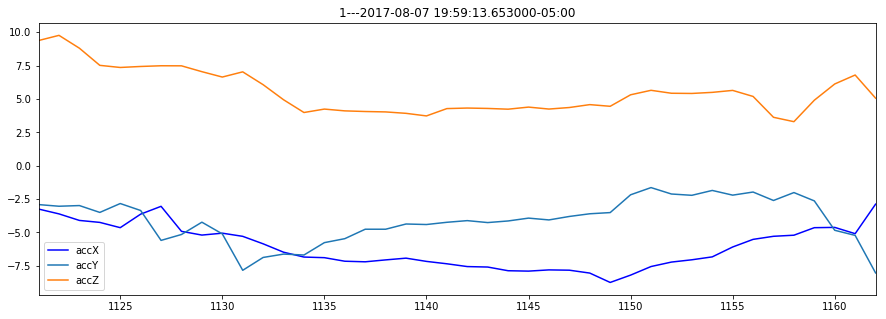

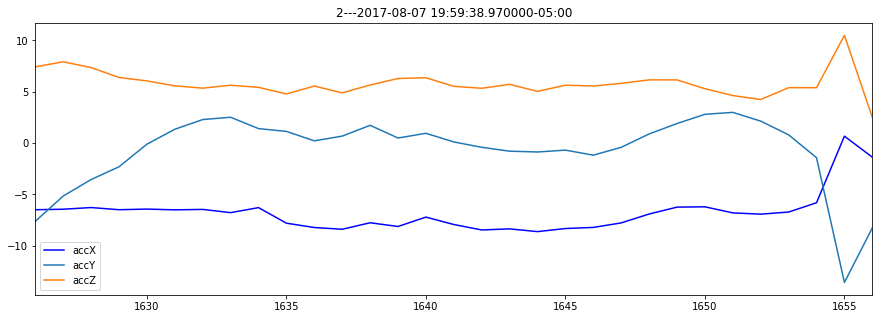

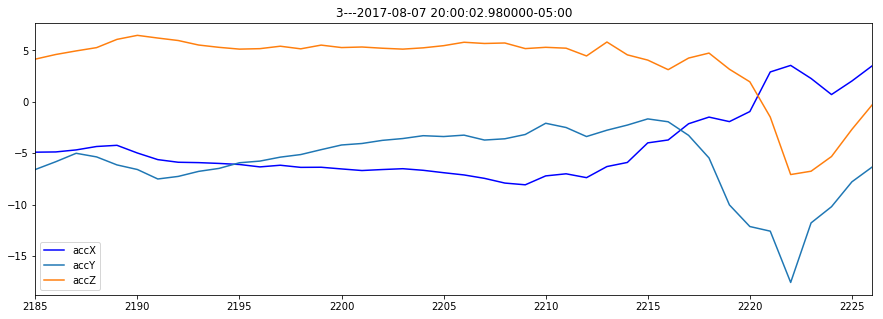

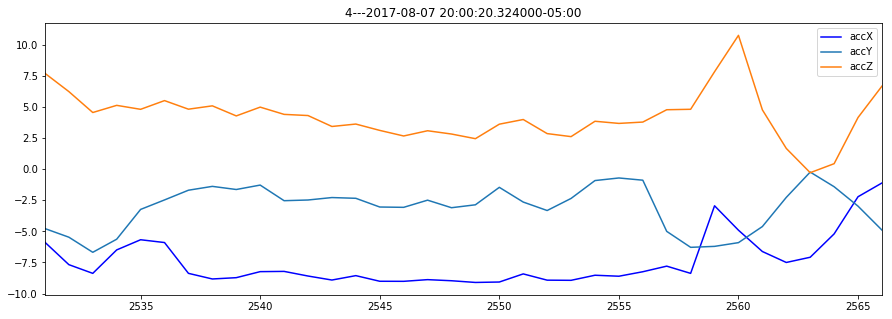

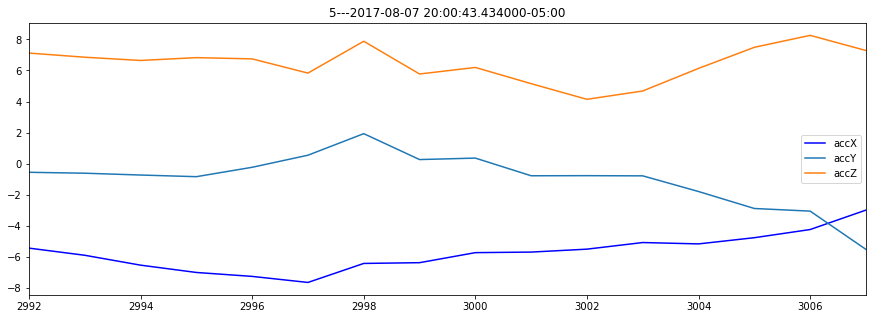

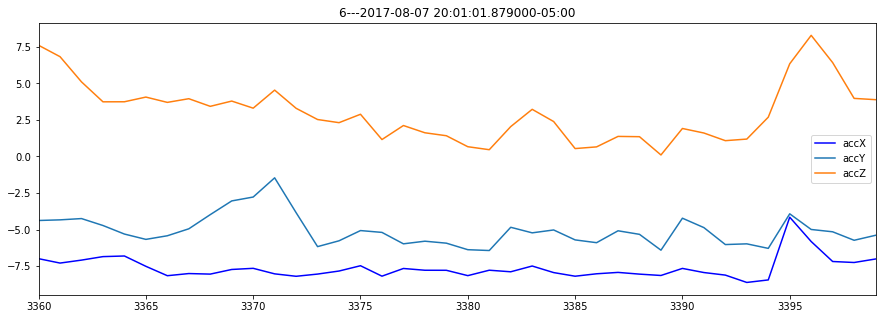

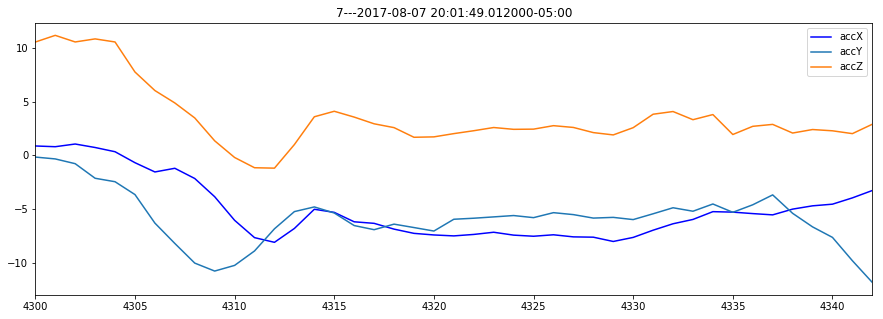

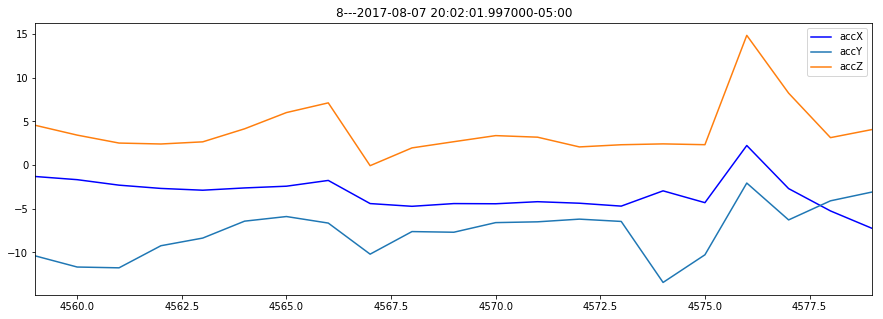

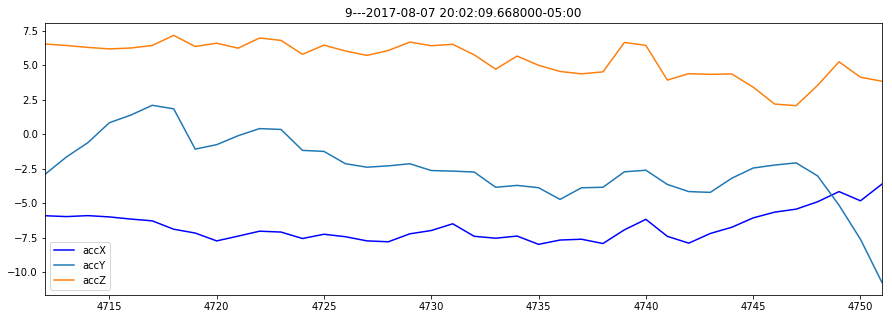

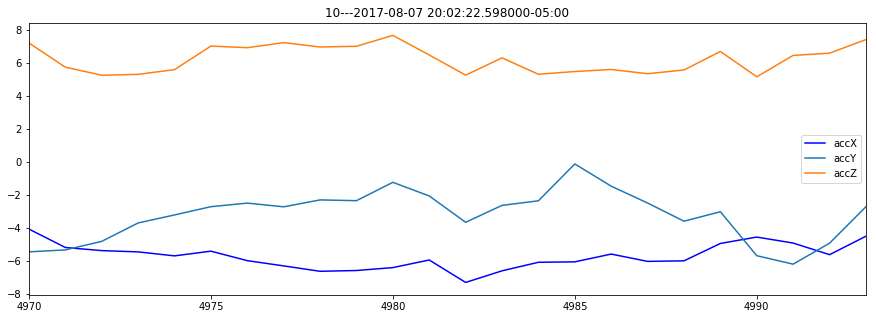

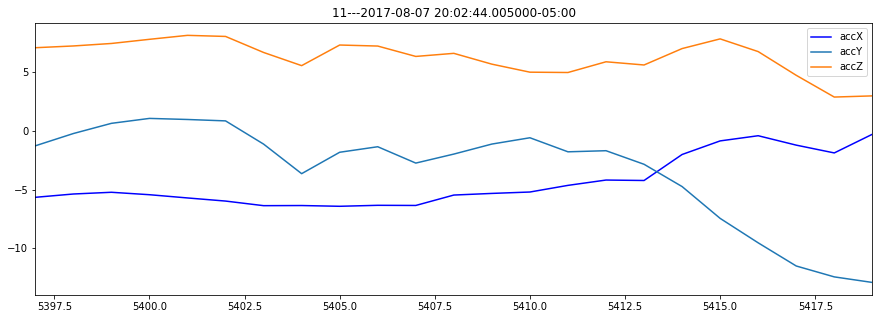

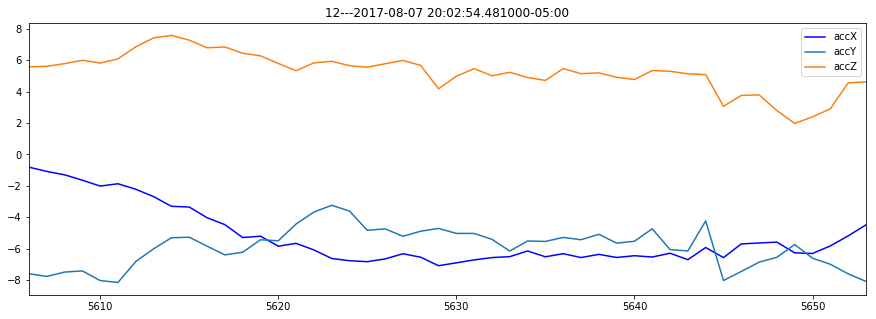

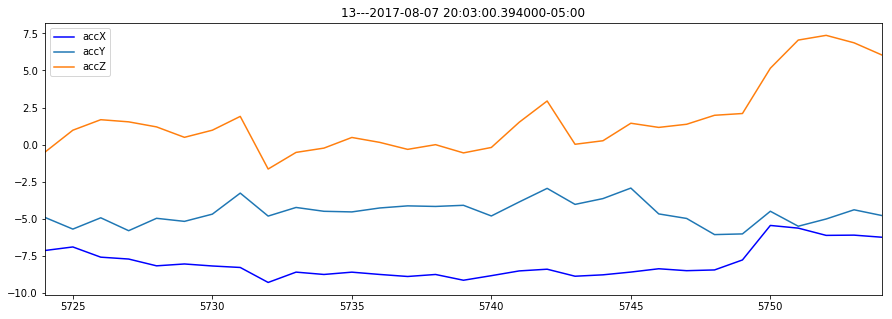

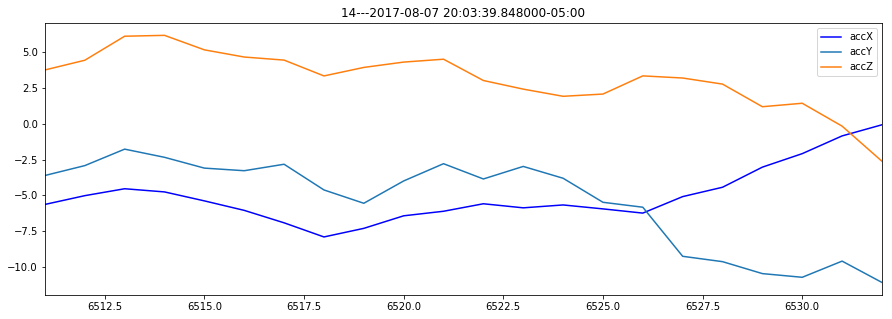

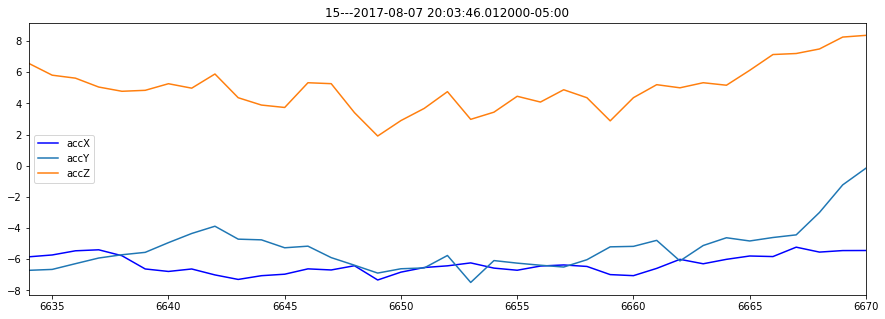

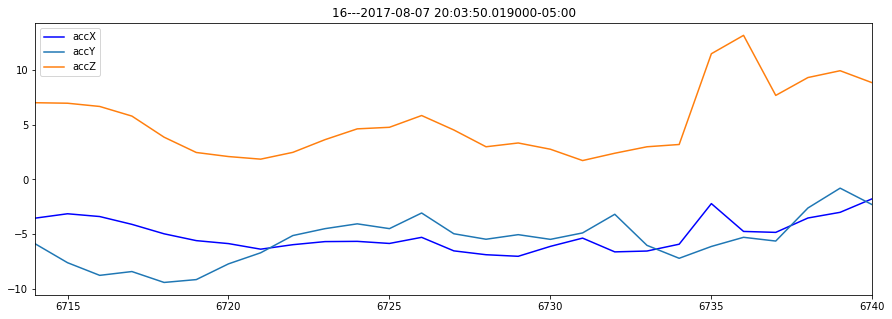

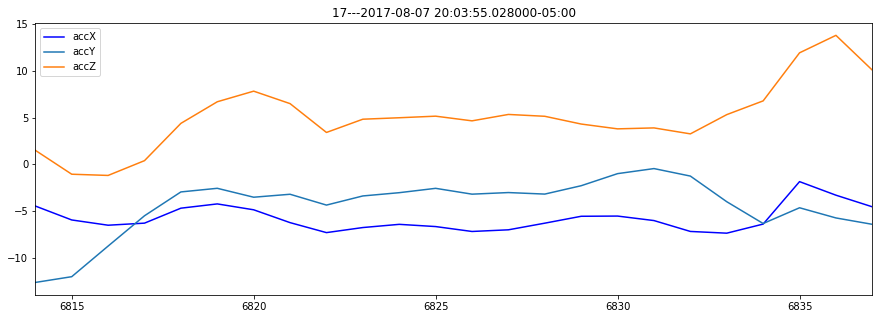

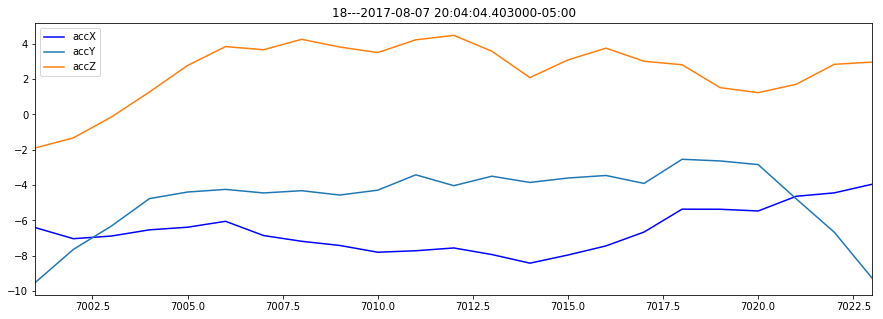

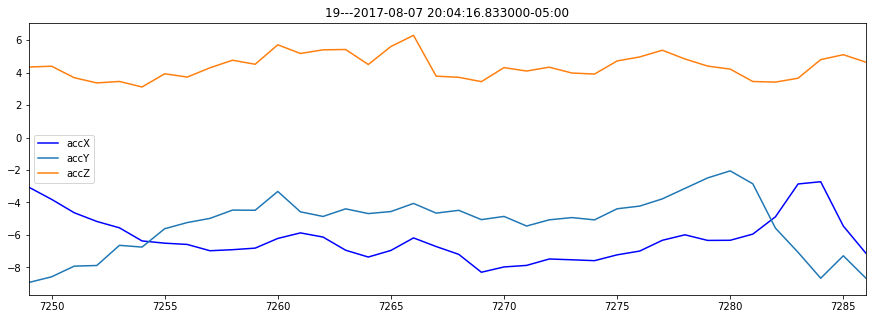

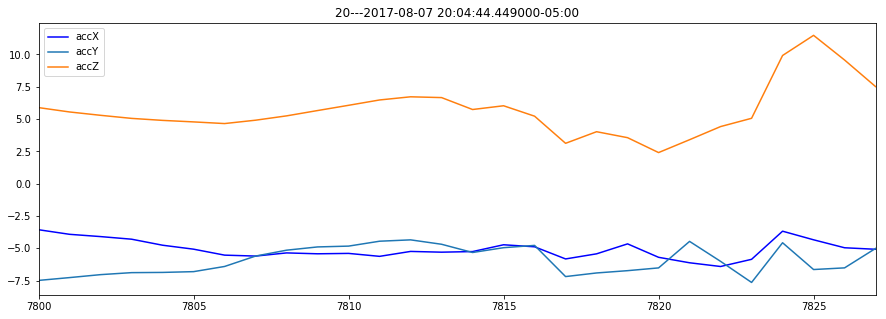

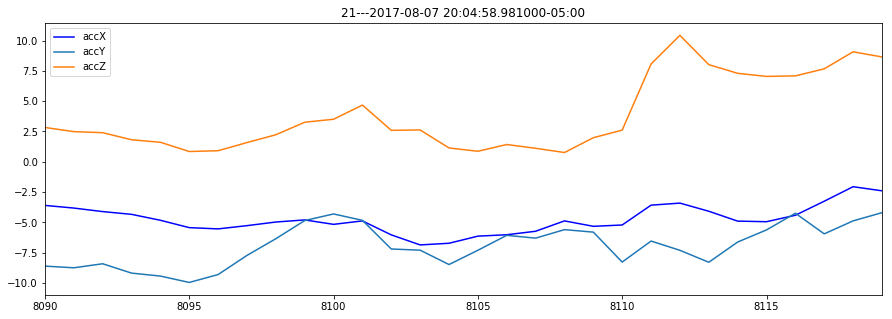

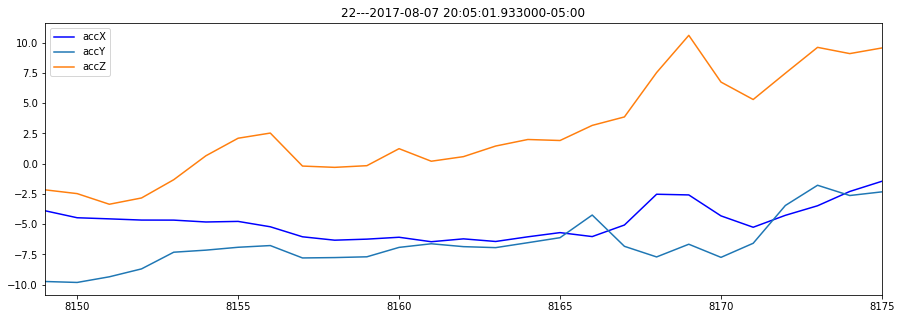

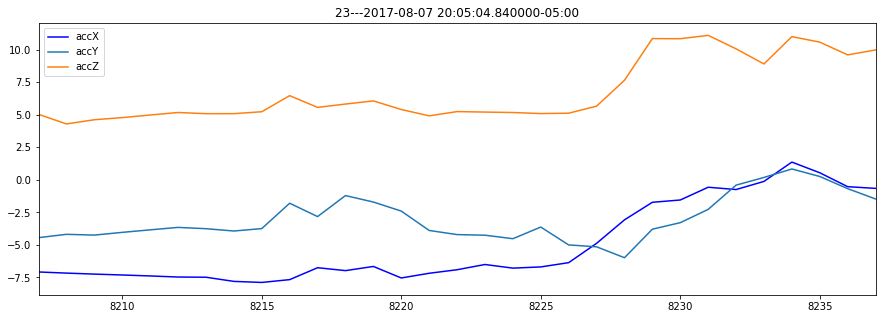

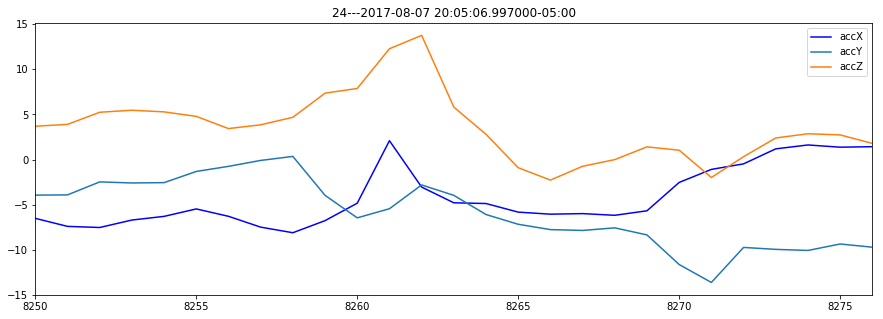

In [119]:
import os

PROC_FOLDER = '/Volumes/SHIBO/BeYourself/BeYourself/PROCESS'
proc_subj_folder = os.path.join(PROC_FOLDER, 'P108/WRIST')
meal = '0807meal1_part1'
acc_label_file = os.path.join(proc_subj_folder, meal, 'data_label/accel_label_index.csv')


# fg_category = 'fd'
# fg_category = 'dd'

# acc_fd_folder = os.path.join(proc_subj_folder, meal, fg_category, 'acc')
# gyr_fd_folder = os.path.join(proc_subj_folder, meal, fg_category, 'gyr')

# def readFeedingGesture(fg_folder):
#     namelist = find_csv_filenames( fg_folder, suffix=".csv" )
#     n = len(namelist)
    
#     df_all = pd.DataFrame()
    
#     for i in range(n):
#         df = pd.read_csv( os.path.join(fg_folder , 'fg_' + str(i) + '.csv' ))
#         df['ind'] = i
#         df_all = pd.concat([df_all, df])
        
#     df_all = df_all[['ind' , 'Time', 'accX', 'accY', 'accZ']]
#     return df_all

# df = readFeedingGesture(acc_fd_folder)

df = pd.read_csv(acc_label_file)
for i in range(len(set(df.fd_ind))-1):
    plot_acc_by_fgcategory_index(df, 'fd_ind', i+1)
df = add_padding_df( df , ['fd', 'dd', 'fd_ind', 'dd_ind'] , 0.10 )

1  start time:
2017-08-07 19:59:13.402000-05:00
1  end time:
2017-08-07 19:59:15.909000-05:00
2  start time:
2017-08-07 19:59:38.769000-05:00
2  end time:
2017-08-07 19:59:40.623000-05:00
3  start time:
2017-08-07 20:00:02.723000-05:00
3  end time:
2017-08-07 20:00:05.230000-05:00
4  start time:
2017-08-07 20:00:20.121000-05:00
4  end time:
2017-08-07 20:00:22.230000-05:00
5  start time:
2017-08-07 20:00:43.332000-05:00
5  end time:
2017-08-07 20:00:44.239000-05:00
6  start time:
2017-08-07 20:01:01.676000-05:00
6  end time:
2017-08-07 20:01:04.035000-05:00
7  start time:
2017-08-07 20:01:48.762000-05:00
7  end time:
2017-08-07 20:01:51.317000-05:00
8  start time:
2017-08-07 20:02:01.847000-05:00
8  end time:
2017-08-07 20:02:03.097000-05:00
9  start time:
2017-08-07 20:02:09.465000-05:00
9  end time:
2017-08-07 20:02:11.824000-05:00
10  start time:
2017-08-07 20:02:22.449000-05:00
10  end time:
2017-08-07 20:02:23.848000-05:00
11  start time:
2017-08-07 20:02:43.848000-05:00
11  end t

/Users/shibozhang/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



2017-08-07 20:04:58.833000-05:00
21  end time:
2017-08-07 20:05:00.582000-05:00
22  start time:
2017-08-07 20:05:01.785000-05:00
22  end time:
2017-08-07 20:05:03.340000-05:00
23  start time:
2017-08-07 20:05:04.645000-05:00
23  end time:
2017-08-07 20:05:06.496000-05:00
24  start time:
2017-08-07 20:05:06.847000-05:00
24  end time:
2017-08-07 20:05:08.402000-05:00


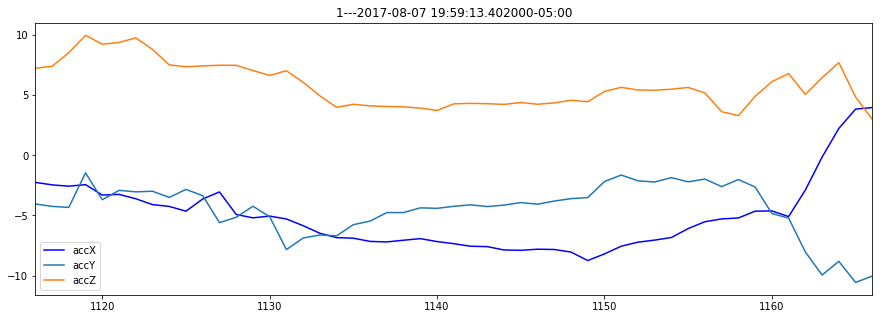

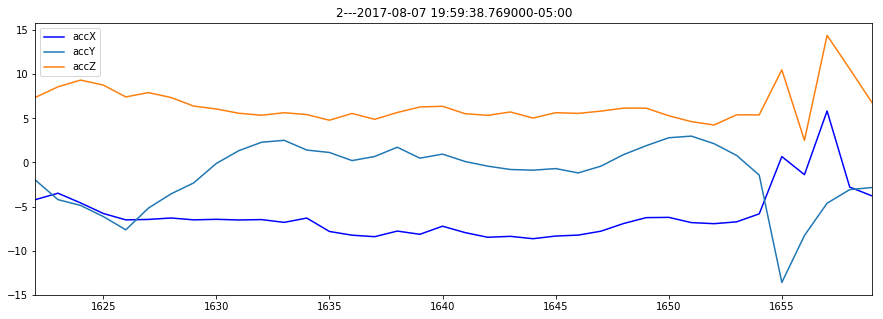

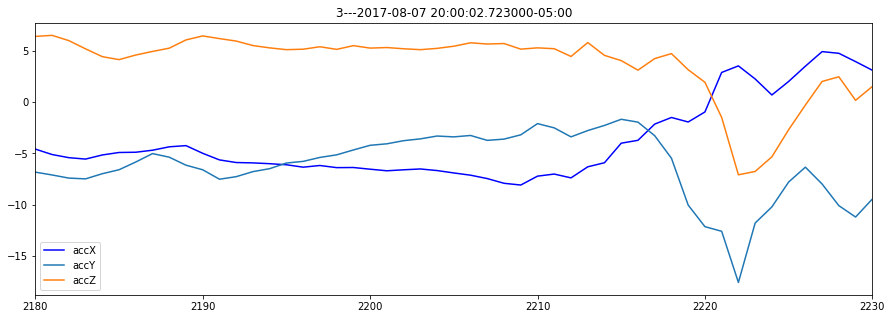

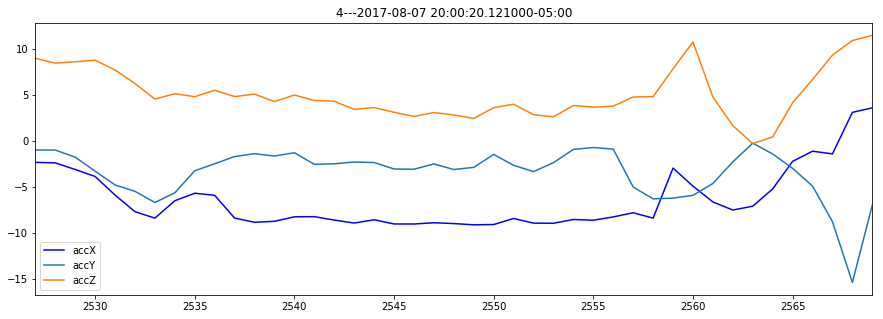

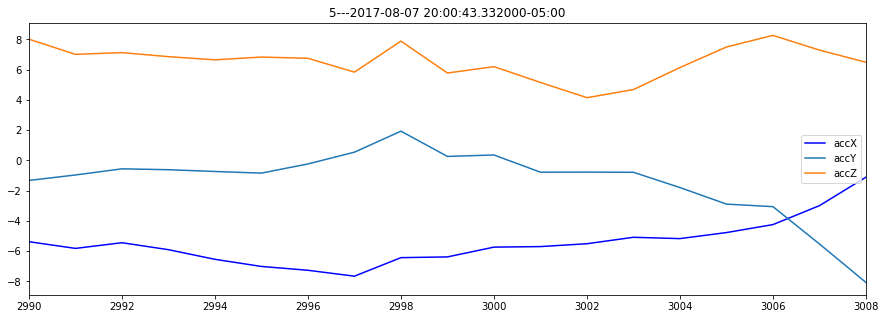

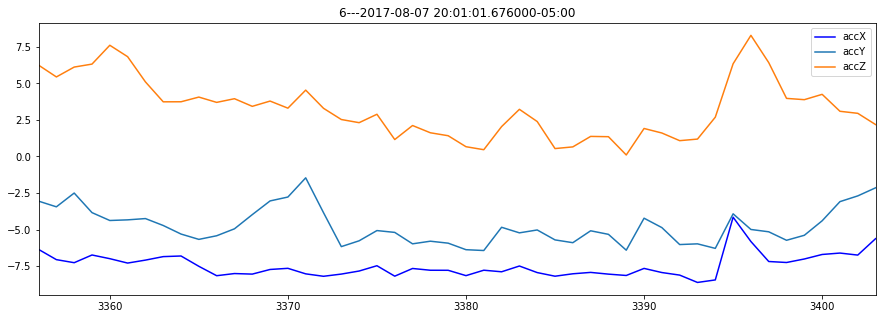

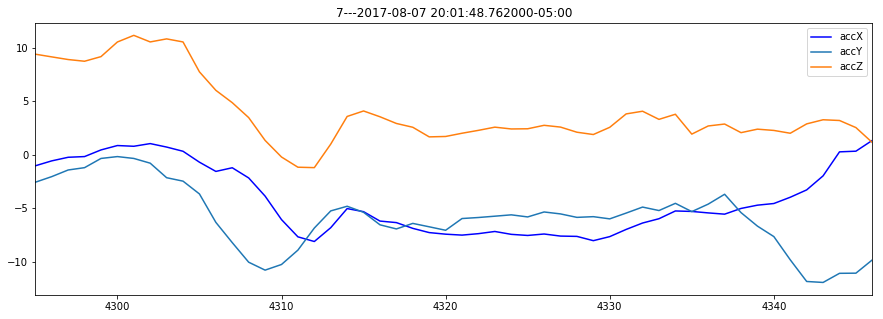

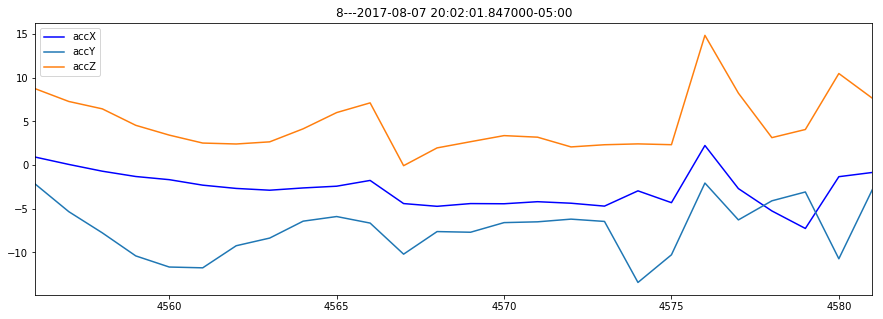

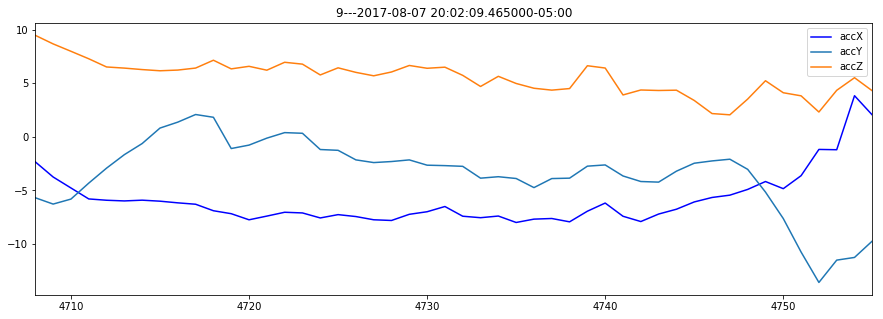

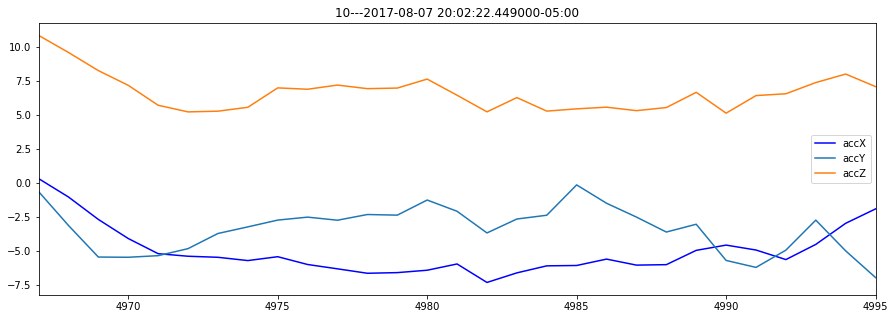

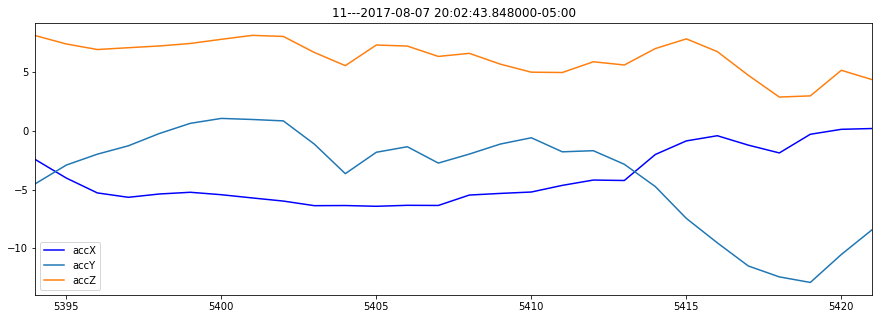

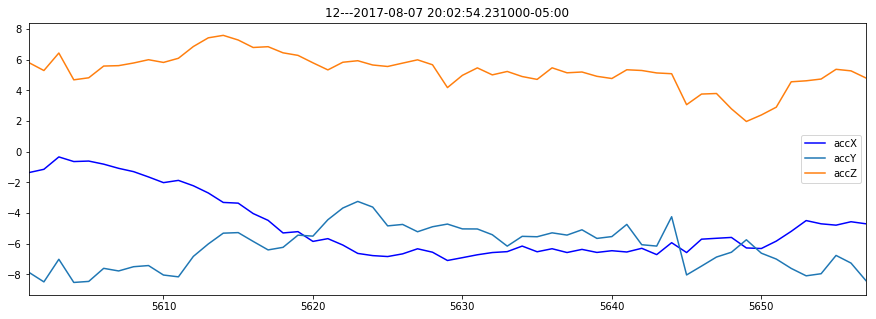

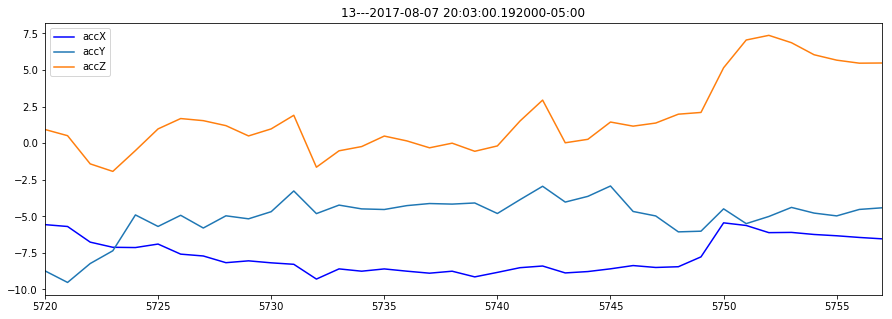

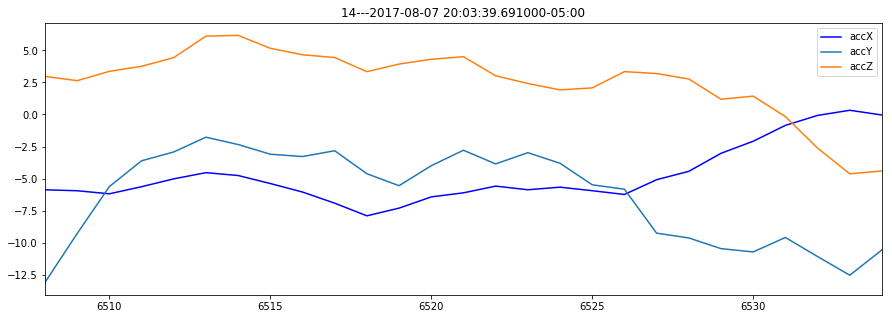

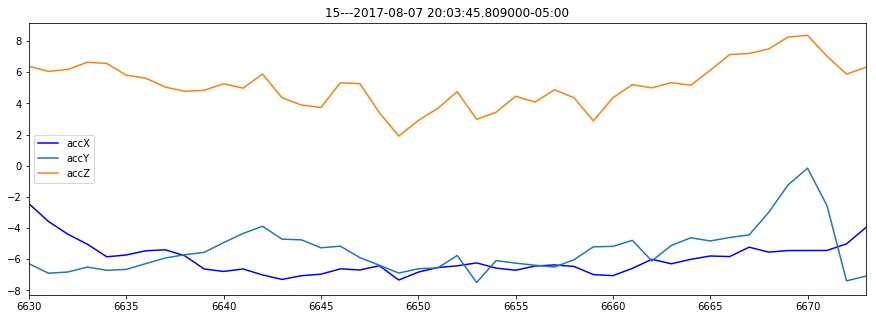

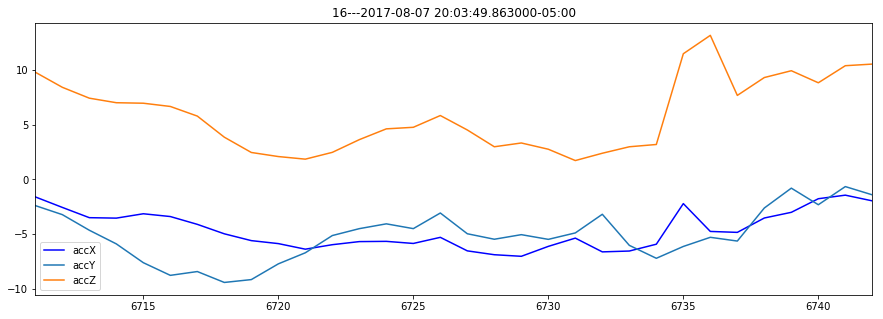

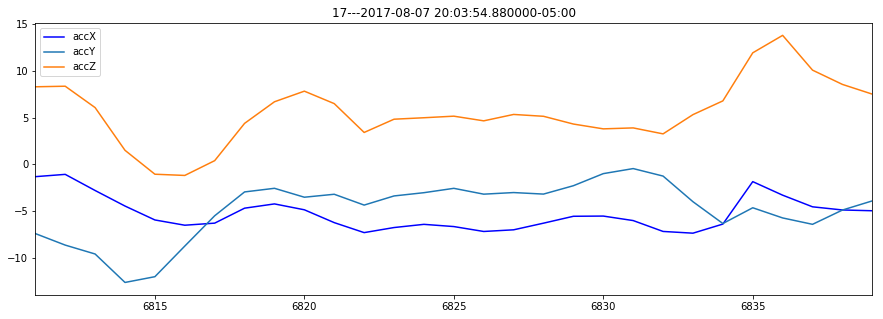

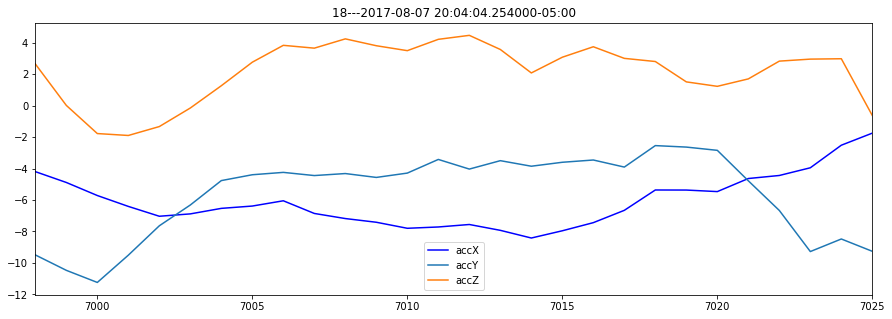

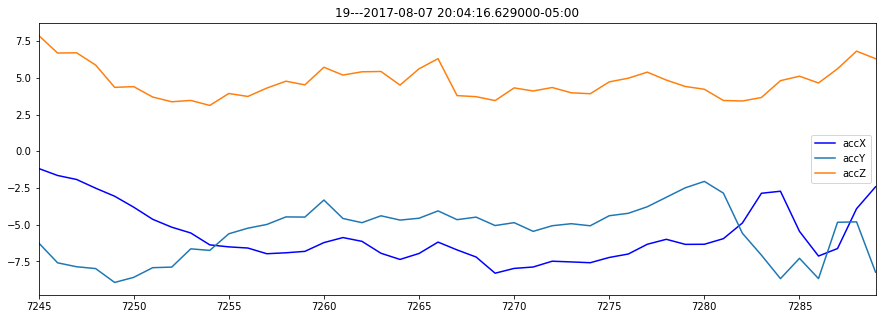

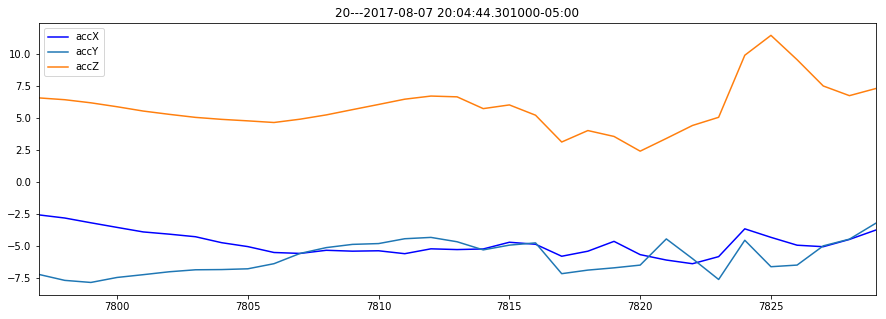

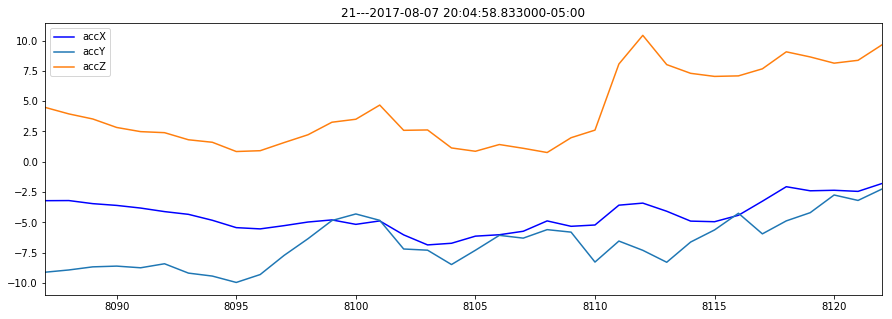

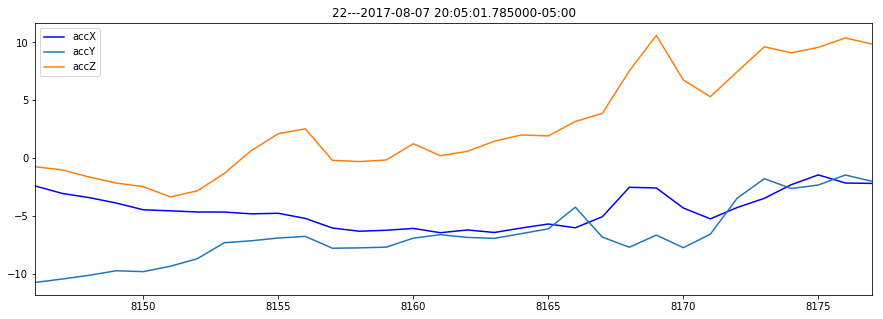

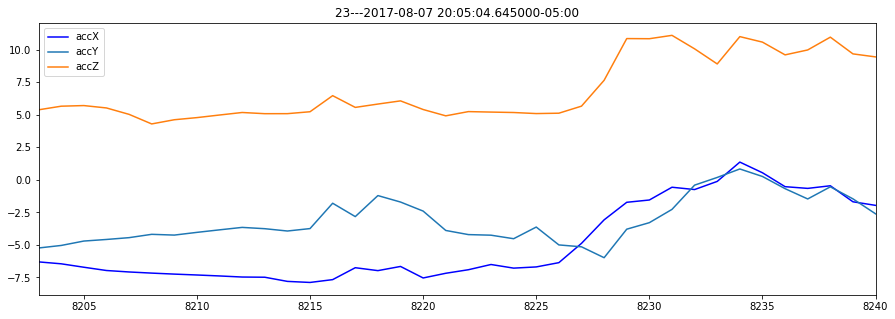

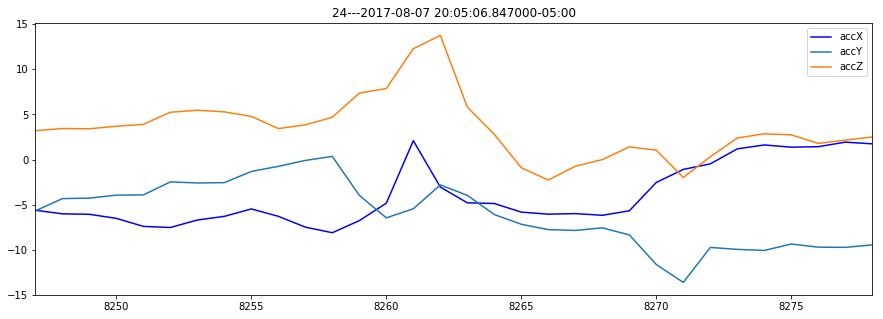

In [120]:
for i in range(len(set(df.fd_ind))-1):
    
    plot_acc_by_fgcategory_index(df, 'fd_ind', i+1)
    



/Users/shibozhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/shibozhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/shibozhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

1  start time:
2017-08-07 19:59:13.402000-05:00
1  end time:
2017-08-07 19:59:15.909000-05:00
2  start time:
2017-08-07 19:59:38.769000-05:00
2  end time:
2017-08-07 19:59:40.623000-05:00
3  start time:
2017-08-07 20:00:02.723000-05:00
3  end time:
2017-08-07 20:00:05.230000-05:00
4  start time:
2017-08-07 20:00:20.121000-05:00
4  end time:
2017-08-07 20:00:22.230000-05:00
5  start time:
2017-08-07 20:00:43.332000-05:00
5  end time:
2017-08-07 20:00:44.239000-05:00
6  start time:
2017-08-07 20:01:01.676000-05:00
6  end time:
2017-08-07 20:01:04.035000-05:00
7  start time:
2017-08-07 20:01:48.762000-05:00
7  end time:
2017-08-07 20:01:51.317000-05:00
8  start time:
2017-08-07 20:02:01.847000-05:00
8  end time:
2017-08-07 20:02:03.097000-05:00
9  start time:
2017-08-07 20:02:09.465000-05:00
9  end time:
2017-08-07 20:02:11.824000-05:00
10  start time:
2017-08-07 20:02:22.449000-05:00
10  end time:
2017-08-07 20:02:23.848000-05:00
11  start time:
2017-08-07 20:02:43.848000-05:00
11  end t

/Users/shibozhang/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


21  start time:
2017-08-07 20:04:58.833000-05:00
21  end time:
2017-08-07 20:05:00.582000-05:00
22  start time:
2017-08-07 20:05:01.785000-05:00
22  end time:
2017-08-07 20:05:03.340000-05:00
23  start time:
2017-08-07 20:05:04.645000-05:00
23  end time:
2017-08-07 20:05:06.496000-05:00
24  start time:
2017-08-07 20:05:06.847000-05:00
24  end time:
2017-08-07 20:05:08.402000-05:00


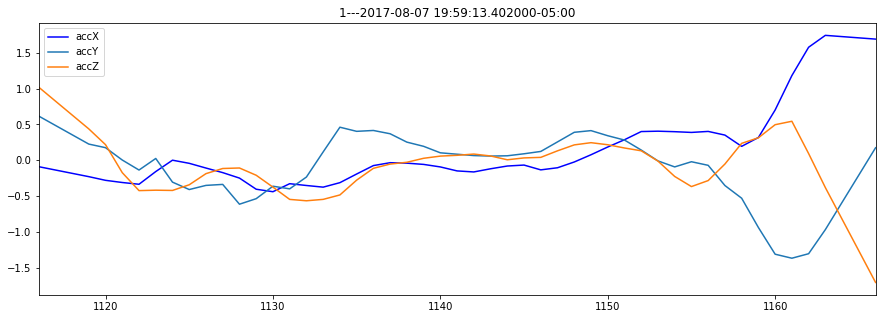

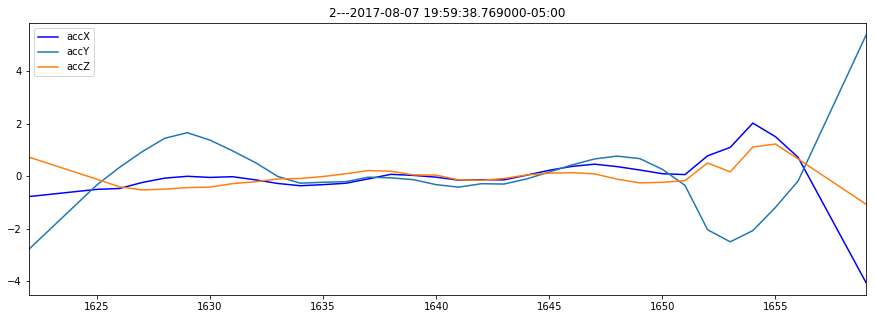

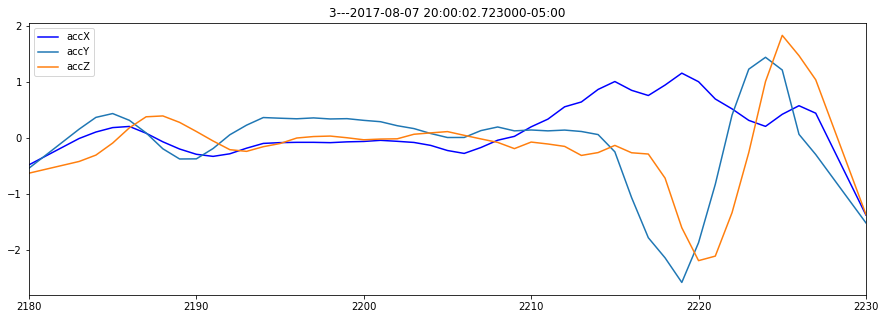

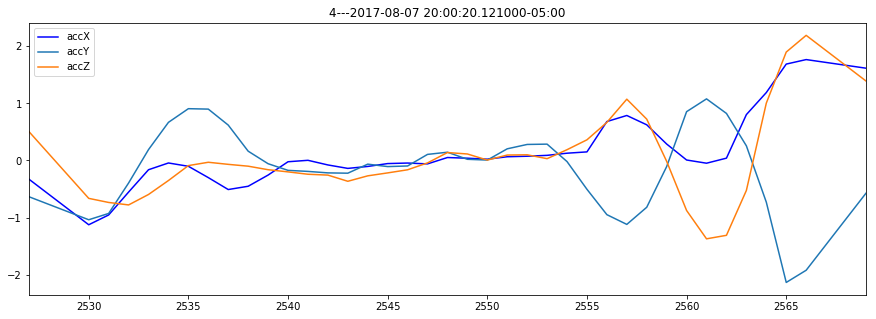

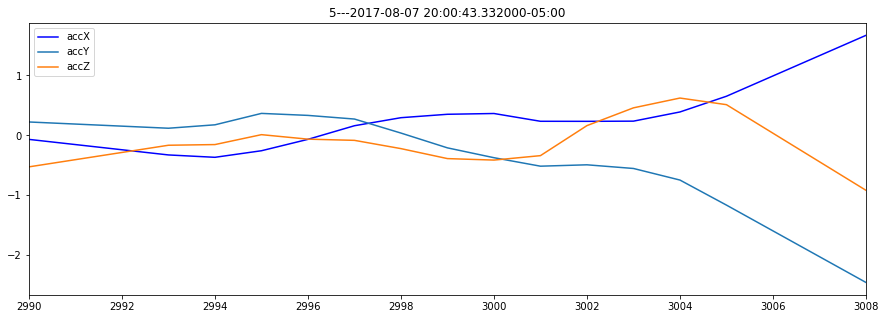

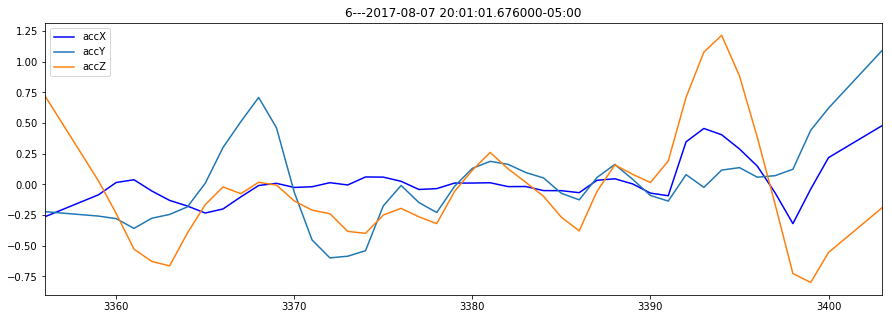

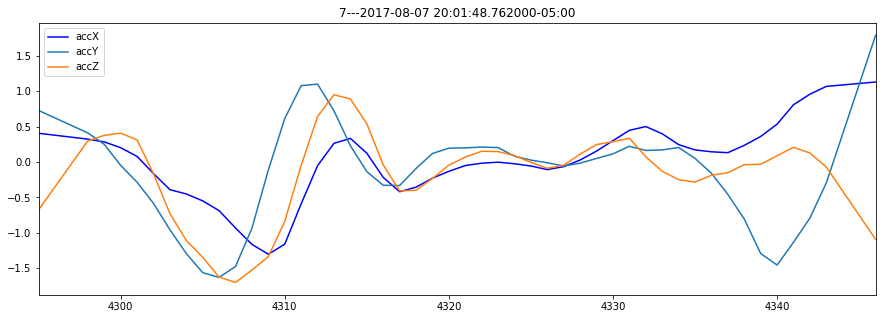

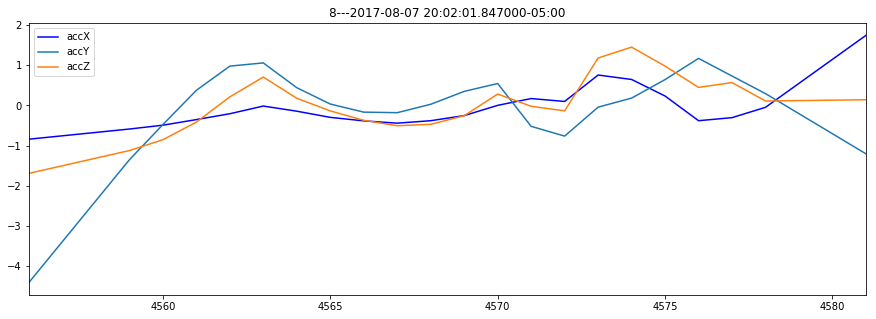

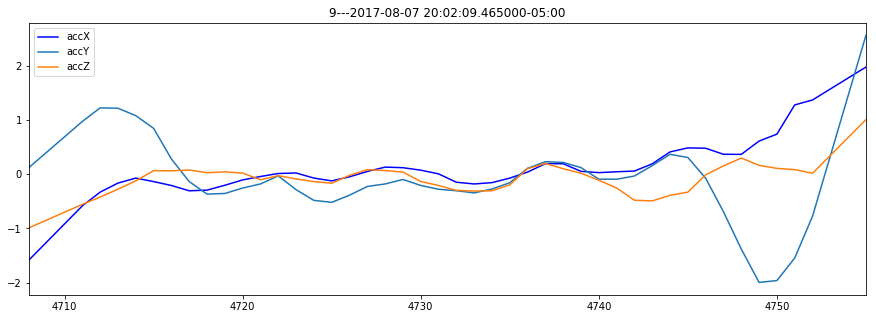

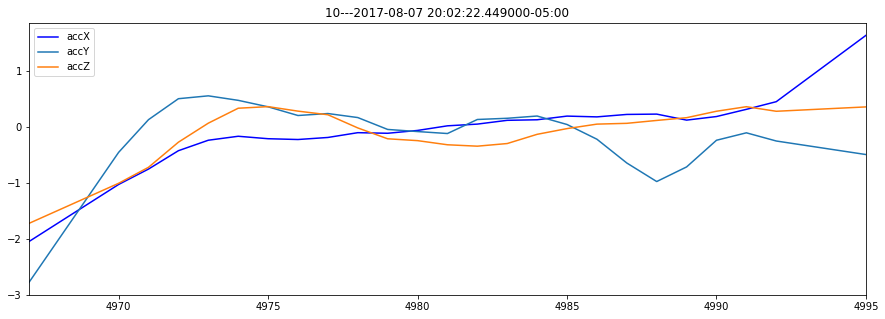

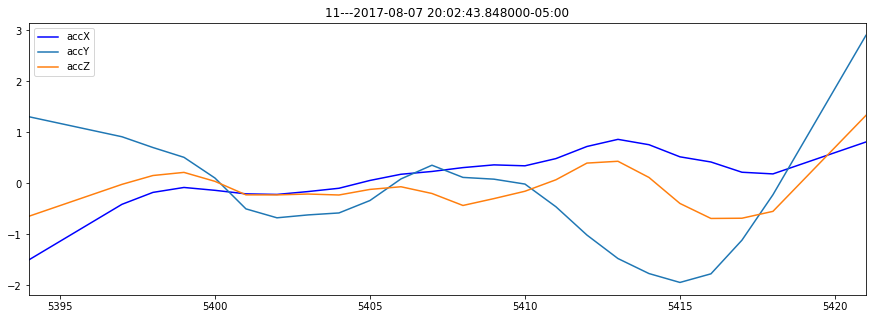

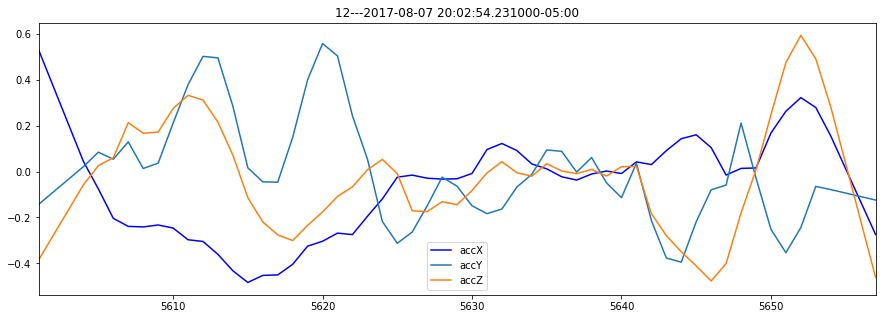

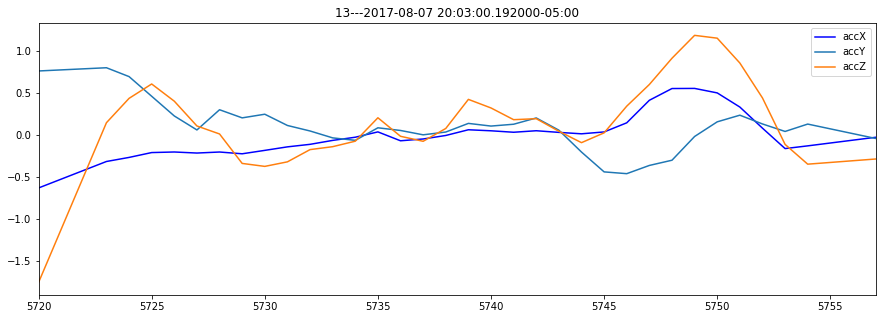

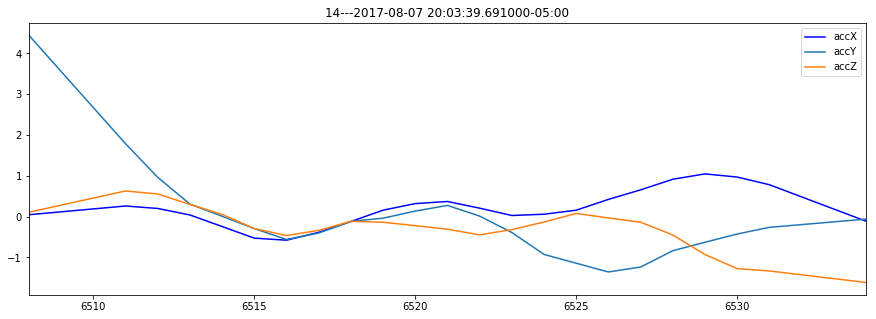

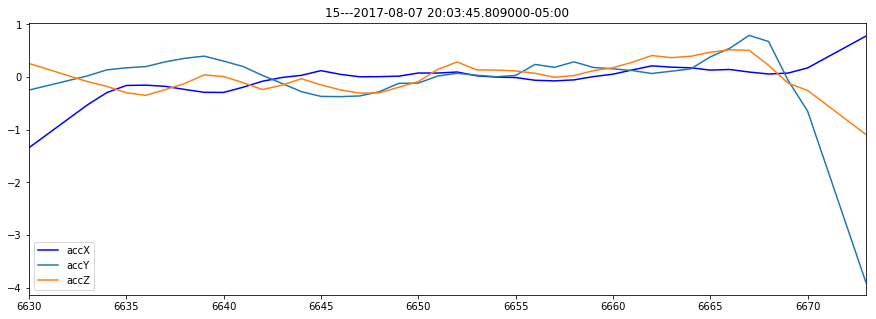

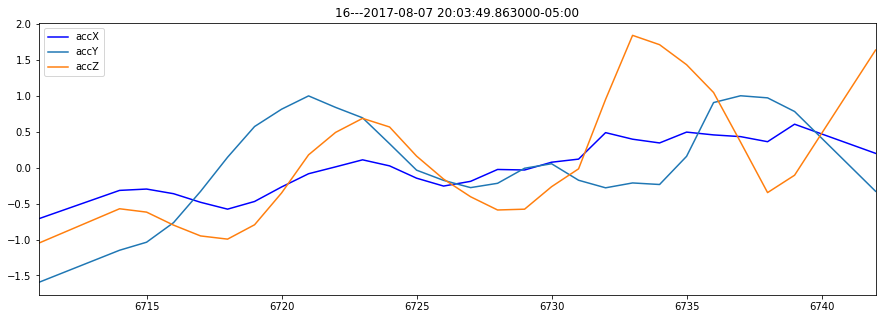

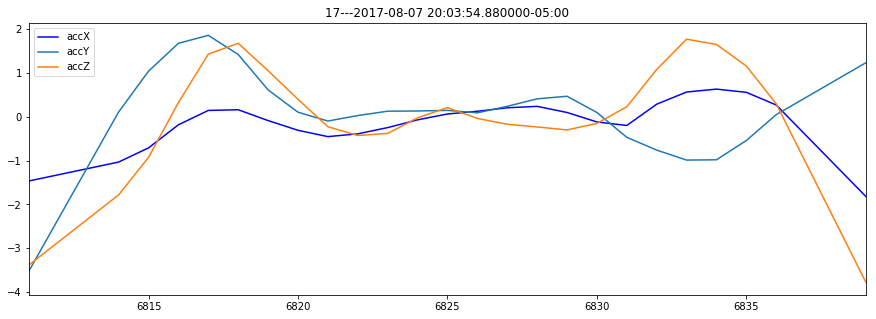

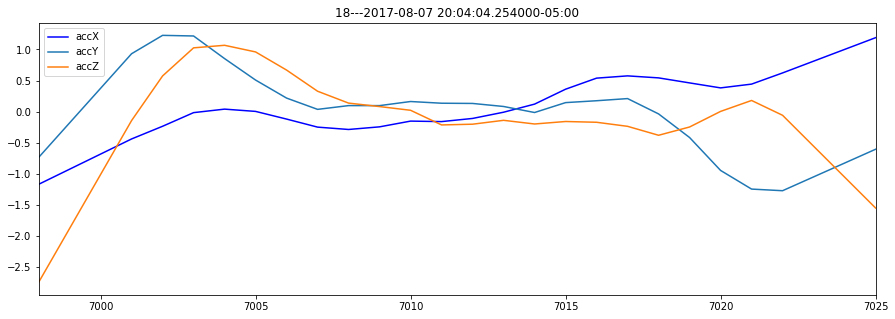

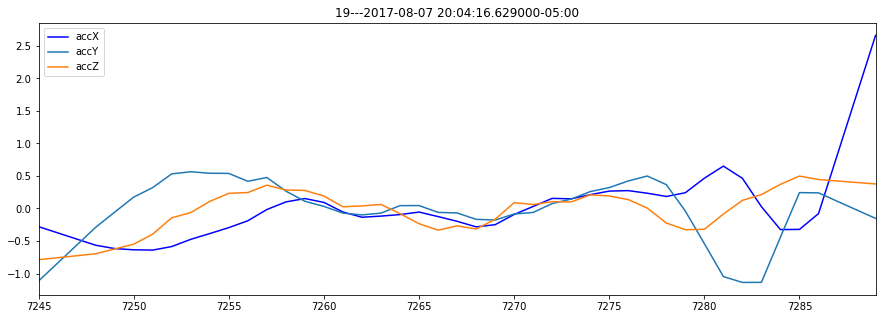

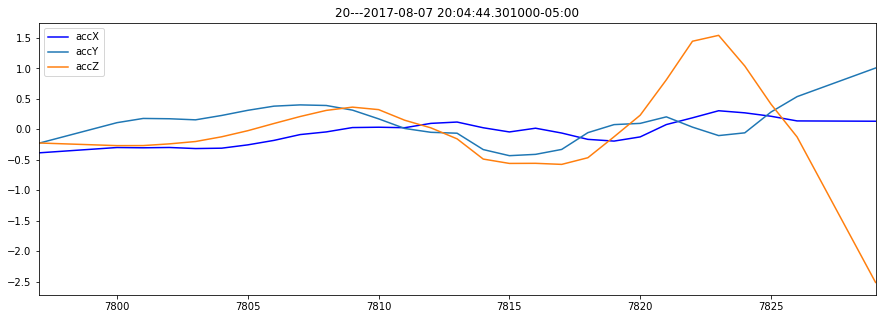

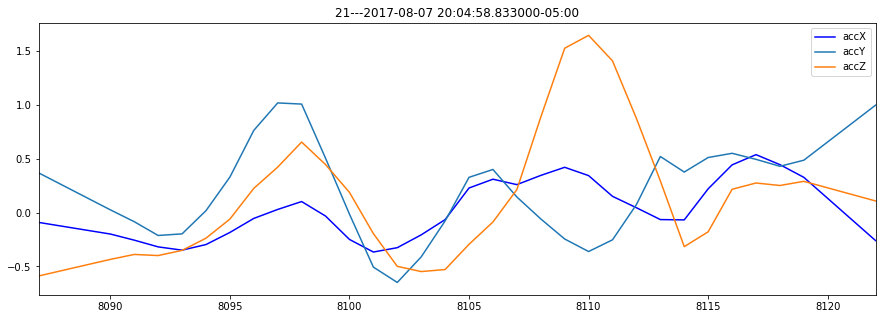

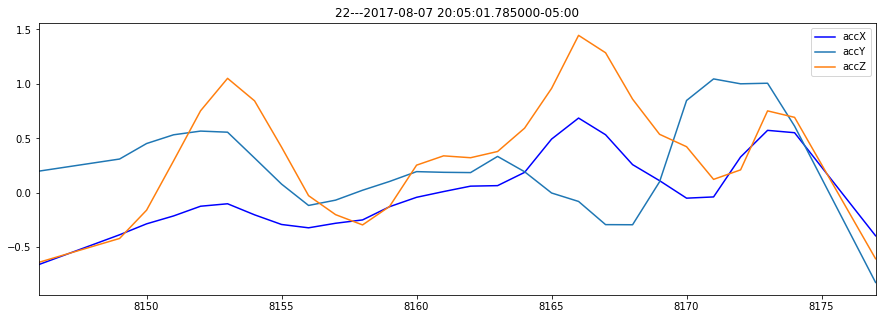

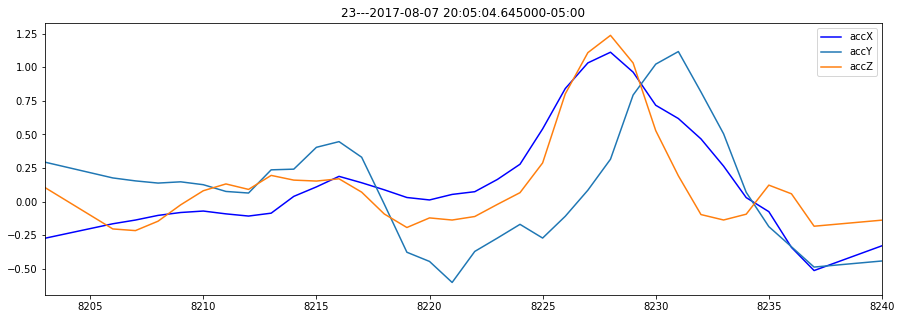

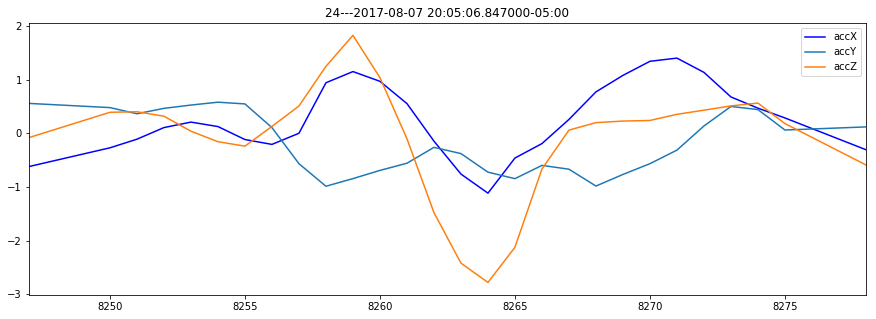

In [126]:
for i in range(len(set(df.fd_ind))-1):

    plot_acc_deriv_by_fgcategory_index(df, 'fd_ind', i+1)
    

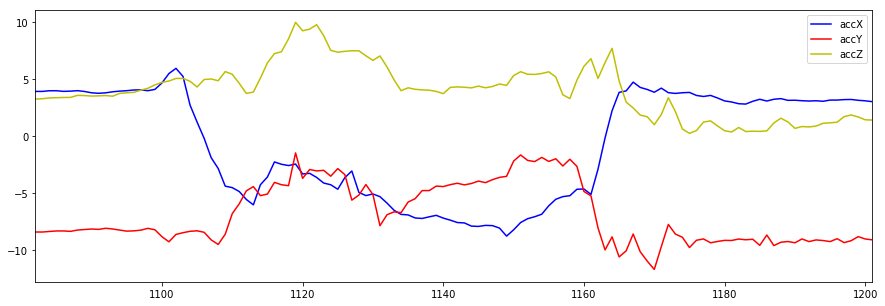

In [24]:
file = '/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P108/WRIST/0807meal1_part1/data_label/accel_label.csv'
acc_df = pd.read_csv(file)
ABSOLUTE_TIME_FORMAT = "%Y-%m-%d %H:%M:%S.%f%z"


acc_df['Time'] = pd.to_datetime(acc_df['Time'])
acc = query_plot_acc(acc_df, '2017-08-07 19:59:11.653000-0500',  '2017-08-07 19:59:17.709000-0500' , '')
# query_plot_acc(acc_df, '2017-08-07 20:04:27.061000-0500',  '2017-08-07 20:04:32.911000-0500' , '')

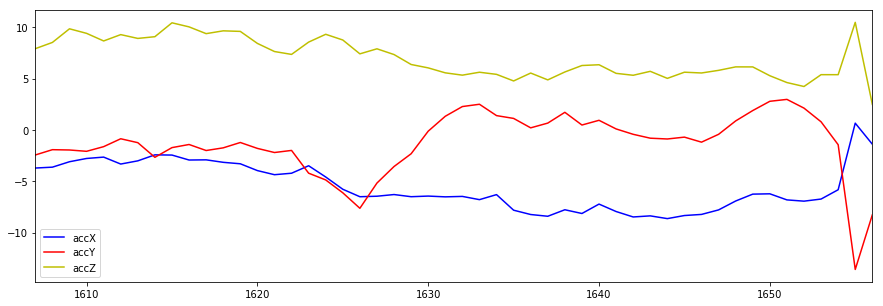

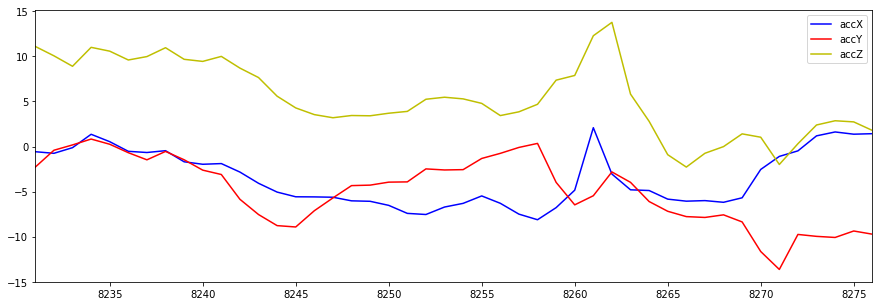

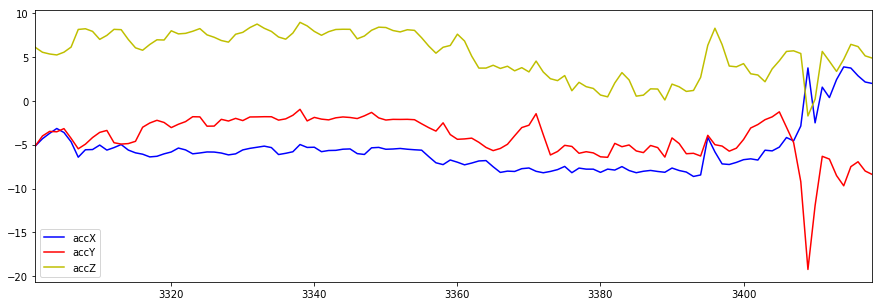

In [244]:
file = '/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P108/WRIST/0807meal1_part1/data_label/accel_label.csv'
acc_df = pd.read_csv(file)
ABSOLUTE_TIME_FORMAT = "%Y-%m-%d %H:%M:%S.%f%z"


acc_df['Time'] = pd.to_datetime(acc_df['Time'])
query_plot_acc(acc_df, '2017-08-07 19:59:37.970000-0500',  '2017-08-07 19:59:40.473000-0500' , '')
query_plot_acc(acc_df, '2017-08-07 20:05:05.997000-0500',  '2017-08-07 20:05:08.301000-0500' , '')
query_plot_acc(acc_df, '2017-08-07 20:00:58.879000-0500',  '2017-08-07 20:01:04.832000-0500' , '')

In [80]:
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)

In [82]:
y = acc[['accX']]
y = y.as_matrix().ravel()
x = len(y)
x = np.array(list(range(x)))/20
# print(x)
# print(y)

y_sm = savgol_filter(y, 5, 2)

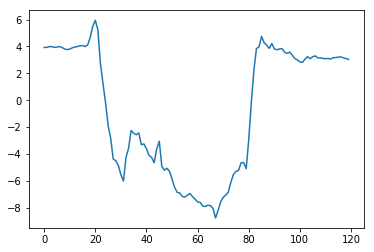

In [92]:
plt.plot(y)

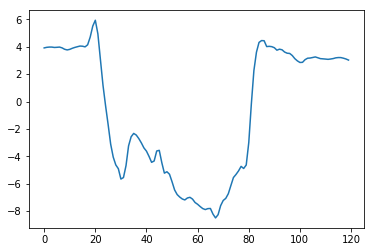

In [93]:
y_sm = savgol_filter(y, window_length=5, polyorder=2, deriv=0)
plt.plot(y_sm)

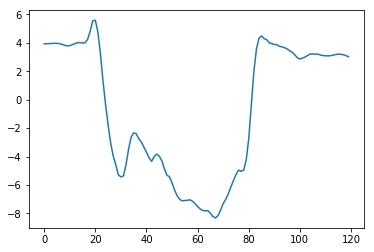

In [94]:
y_sm = savgol_filter(y, window_length=7, polyorder=2, deriv=0)
plt.plot(y_sm)

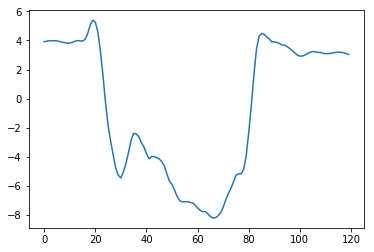

In [95]:
y_sm = savgol_filter(y, window_length=9, polyorder=2, deriv=0)
plt.plot(y_sm)

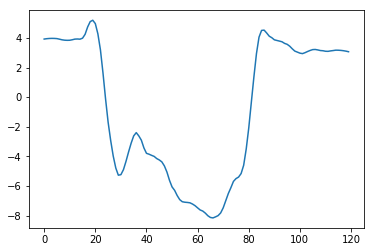

In [96]:
y_sm = savgol_filter(y, window_length=11, polyorder=2, deriv=0)
plt.plot(y_sm)

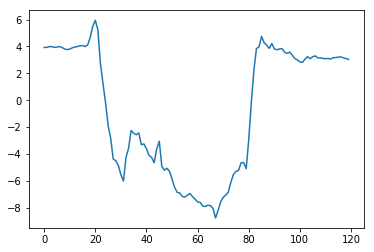

In [97]:
y_sm = savgol_filter(y, window_length=5, polyorder=4, deriv=0)
plt.plot(y_sm)

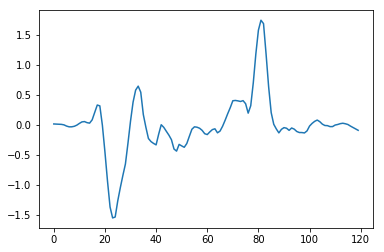

In [90]:
y_d_sm = savgol_filter(y, window_length=7, polyorder=2, deriv=1)
plt.plot(y_d_sm)

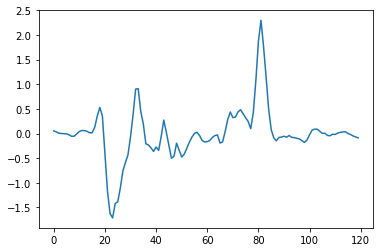

In [100]:
y_d_sm = savgol_filter(y, window_length=5, polyorder=2, deriv=1)
plt.plot(y_d_sm)

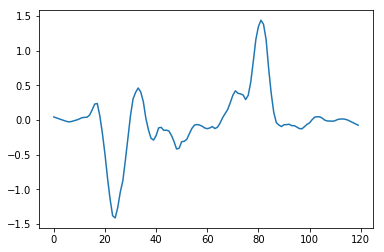

In [101]:
y_d_sm = savgol_filter(y, window_length=9, polyorder=2, deriv=1)
plt.plot(y_d_sm)

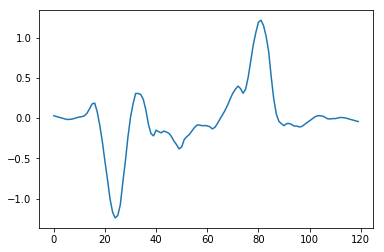

In [102]:
y_d_sm = savgol_filter(y, window_length=11, polyorder=2, deriv=1)
plt.plot(y_d_sm)

In [127]:
len(y_d_sm)

120

## create derivative integral signal

In [131]:
def gen_integ(y):
    y_int = np.zeros(y.size)
    y_int[0] = y[0]
    for i in range(1, y.size):
        y_int[i] = y_int[i-1] + y[i]
        
    return y_int

## harr-like feature 1: one part

In [146]:
def gen_feat_1rec(y, stride = 4):
    l = y.size
    y_integ = gen_integ(y)
    # l = 120, stride = 4
    feats = np.zeros(435)
    n = 0
    for i in range(0, l, stride):
        for j in range(i+stride, l, stride):
            feats[n] = y_integ[j] - y_integ[i]
            n = n + 1
    return feats

In [134]:
y_d_sm_int = gen_integ(y_d_sm)

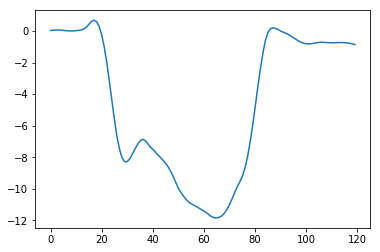

In [136]:
plt.plot(y_d_sm_int)

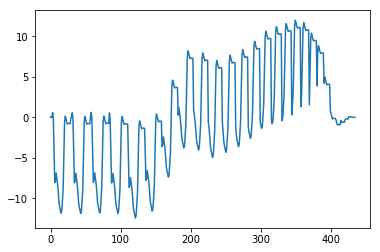

In [168]:
plt.plot(gen_feat_1rec(y_d_sm))

In [162]:
gen_feat_1rec(y_d_sm)

array([  2.40e-02,  -2.86e-02,   3.59e-02,   5.76e-01,  -2.78e-01,
        -4.46e+00,  -8.08e+00,  -7.82e+00,  -6.89e+00,  -7.53e+00,
        -8.22e+00,  -9.26e+00,  -1.05e+01,  -1.11e+01,  -1.14e+01,
        -1.19e+01,  -1.16e+01,  -1.03e+01,  -8.72e+00,  -4.85e+00,
        -6.34e-01,   1.28e-01,  -1.74e-01,  -5.63e-01,  -8.39e-01,
        -7.80e-01,  -7.65e-01,  -7.70e-01,  -7.88e-01,  -5.25e-02,
         1.19e-02,   5.52e-01,  -3.02e-01,  -4.49e+00,  -8.10e+00,
        -7.84e+00,  -6.92e+00,  -7.56e+00,  -8.24e+00,  -9.28e+00,
        -1.05e+01,  -1.11e+01,  -1.15e+01,  -1.19e+01,  -1.16e+01,
        -1.03e+01,  -8.75e+00,  -4.87e+00,  -6.58e-01,   1.04e-01,
        -1.98e-01,  -5.87e-01,  -8.63e-01,  -8.04e-01,  -7.89e-01,
        -7.94e-01,  -8.12e-01,   6.45e-02,   6.05e-01,  -2.50e-01,
        -4.43e+00,  -8.05e+00,  -7.79e+00,  -6.86e+00,  -7.50e+00,
        -8.19e+00,  -9.23e+00,  -1.05e+01,  -1.10e+01,  -1.14e+01,
        -1.18e+01,  -1.15e+01,  -1.02e+01,  -8.69e+00,  -4.82e

## harr-like feature 2: two part

In [159]:
def gen_feat_2rec(y, stride = 4):
    l = y.size
    y_integ = gen_integ(y)
    # l = 120, stride = 4
    feats = np.zeros(4060)
    n = 0
    for i in range(0, l, stride):
        for j in range(i+stride, l, stride):
            for k in range(j+stride, l, stride):
                tmp1 = y_integ[j] - y_integ[i]
                tmp2 = y_integ[k] - y_integ[j]
                feats[n] = tmp1 - tmp2*(j - i)/(k - j)
                n = n + 1
    return feats

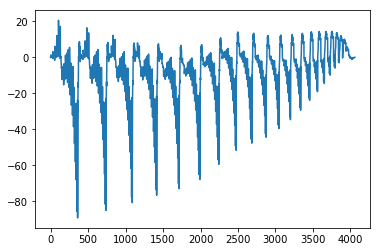

In [172]:
plt.plot(gen_feat_2rec(y_d_sm))

## harr-like feature 3: three part

In [161]:
# def gen_feat_3rec(y, stride = 4):
#     l = y.size
#     y_integ = gen_integ(y)
#     # l = 120, stride = 4
#     feats = np.zeros(4060)
#     n = 0
#     for i in range(0, l, stride):
#         for j in range(i+stride, l, stride):
#             for k in range(j+stride, l, stride):
#                 for m in range(j+stride, l, stride):
#                     tmp1 = y_integ[j] - y_integ[i]
#                     tmp2 = y_integ[k] - y_integ[j]
#                     feats[n] = tmp1 - tmp2*(j - i)/(k - j)
#                     n = n + 1
#     return feats



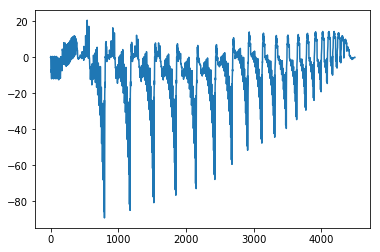

In [171]:
plt.plot(np.hstack((gen_feat_1rec(y_d_sm), gen_feat_2rec(y_d_sm))))

## non-feeding gesture Harr-like features

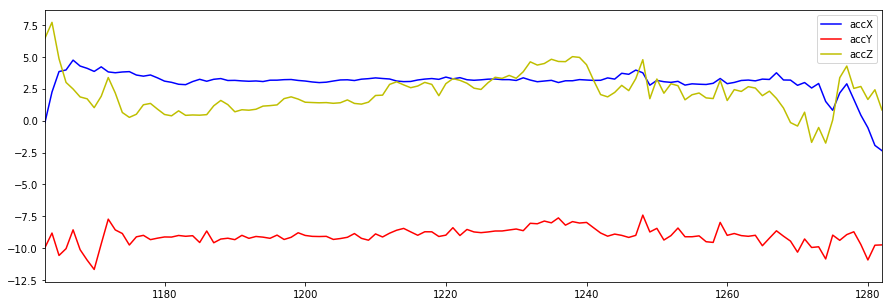

In [182]:
n_acc = query_plot_acc(acc_df, '2017-08-07 19:59:15.709000-0500','2017-08-07 19:59:21.759000-0500', '')

In [183]:
n_acc

,Time,accX,accY,accZ
1163,2017-08-08 00:59:15.759,-0.147430,-9.952682,6.452545
1164,2017-08-08 00:59:15.809,2.236282,-8.813431,7.700333
1165,2017-08-08 00:59:15.859,3.843979,-10.568237,4.846741
1166,2017-08-08 00:59:15.909,3.969666,-10.036468,2.991486
1167,2017-08-08 00:59:15.959,4.739945,-8.560165,2.476364
1168,2017-08-08 00:59:16.010,4.275772,-10.116928,1.855087
1169,2017-08-08 00:59:16.060,4.096771,-10.934341,1.707031
1170,2017-08-08 00:59:16.110,3.854446,-11.665115,1.014343
1171,2017-08-08 00:59:16.160,4.212936,-9.665131,1.906509
1172,2017-08-08 00:59:16.211,3.815414,-7.723694,3.375671


In [184]:
ny = n_acc[['accX']]
ny = ny.as_matrix().ravel()

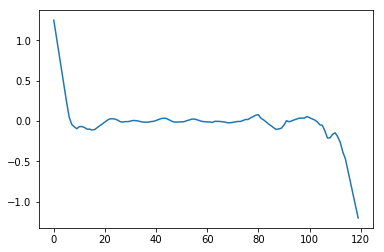

In [186]:
ny_d_sm = savgol_filter(ny, window_length=11, polyorder=2, deriv=1)
plt.plot(ny_d_sm)

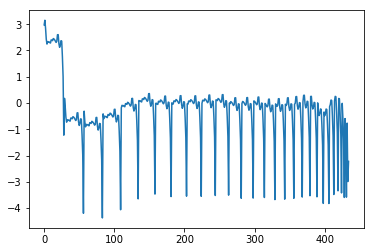

In [189]:
plt.plot(gen_feat_1rec(ny_d_sm))

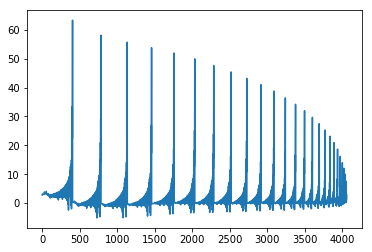

In [191]:
plt.plot(gen_feat_2rec(ny_d_sm))

In [192]:
df

,Time,accX,accY,accZ,Unixtime,fd,dd,fd_ind,dd_ind
0,2017-08-07 19:58:17.448000-05:00,2.755203,-6.028870,6.333527,1502153897448,0,0,0,0
1,2017-08-07 19:58:17.497000-05:00,2.638565,-6.013168,5.787933,1502153897497,0,0,0,0
2,2017-08-07 19:58:17.547000-05:00,2.694260,-6.410202,5.685577,1502153897547,0,0,0,0
3,2017-08-07 19:58:17.598000-05:00,3.203659,-6.989593,6.248779,1502153897598,0,0,0,0
4,2017-08-07 19:58:17.648000-05:00,3.082260,-7.234772,6.264969,1502153897648,0,0,0,0
5,2017-08-07 19:58:17.698000-05:00,2.450028,-7.067184,6.024551,1502153897698,0,0,0,0
6,2017-08-07 19:58:17.749000-05:00,2.033463,-7.114319,5.812698,1502153897749,0,0,0,0
7,2017-08-07 19:58:17.798000-05:00,1.411713,-7.600876,5.354233,1502153897798,0,0,0,0
8,2017-08-07 19:58:17.849000-05:00,1.221283,-8.190720,5.295196,1502153897849,0,0,0,0
9,2017-08-07 19:58:17.898000-05:00,1.626419,-8.485413,5.235214,1502153897898,0,0,0,0


# resampling

In [194]:
df['Time'] = pd.to_datetime(df['Time'])

In [205]:
resmp_df = df.copy()

In [206]:
resmp_df = resmp_df.set_index('Time')

In [207]:
resmp_df
# data.index = pd.to_datetime(data.index, unit='s')


,accX,accY,accZ,Unixtime,fd,dd,fd_ind,dd_ind
Time,,,,,,,,
2017-08-08 00:58:17.448,2.755203,-6.028870,6.333527,1502153897448,0,0,0,0
2017-08-08 00:58:17.497,2.638565,-6.013168,5.787933,1502153897497,0,0,0,0
2017-08-08 00:58:17.547,2.694260,-6.410202,5.685577,1502153897547,0,0,0,0
2017-08-08 00:58:17.598,3.203659,-6.989593,6.248779,1502153897598,0,0,0,0
2017-08-08 00:58:17.648,3.082260,-7.234772,6.264969,1502153897648,0,0,0,0
2017-08-08 00:58:17.698,2.450028,-7.067184,6.024551,1502153897698,0,0,0,0
2017-08-08 00:58:17.749,2.033463,-7.114319,5.812698,1502153897749,0,0,0,0
2017-08-08 00:58:17.798,1.411713,-7.600876,5.354233,1502153897798,0,0,0,0
2017-08-08 00:58:17.849,1.221283,-8.190720,5.295196,1502153897849,0,0,0,0


In [ ]:
resmp_df.resample("20ms", fill_method="ffill")

In [ ]:
tmpdf =pd.DataFrame.to_clipboard()

In [ ]:
tmpdf